In [1]:
import tensorflow as tf
from torchvision import datasets, transforms
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import gzip
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
import os
#we will create a function which can be  used to extract the emnist dataset
def load_emnist_data(split='balanced', extracted_dir='archive'):
    try:
        train_file = os.path.join(extracted_dir, 'emnist-balanced-train.csv')
        test_file = os.path.join(extracted_dir, 'emnist-balanced-test.csv')
        
        train_data = np.loadtxt(train_file, delimiter=',', dtype=np.uint8)
        x_train = train_data[:, 1:]  
        y_train = train_data[:, 0]   
        
        
        test_data = np.loadtxt(test_file, delimiter=',', dtype=np.uint8)
        x_test = test_data[:, 1:]   
        y_test = test_data[:, 0]    

        return (x_train, y_train), (x_test, y_test)
    except FileNotFoundError as e:
        print(f"Error: {e}. Make sure the file exists in the directory '{extracted_dir}'.")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise


In [11]:
(x_train, y_train), (x_test, y_test) = load_emnist_data()
print("Size of the dataset:", len(x_train) + len(x_test))
print("Number of elements in the training set:", len(x_train))
print("Number of elements in the test set:", len(x_test))

Size of the dataset: 131600
Number of elements in the training set: 112800
Number of elements in the test set: 18800


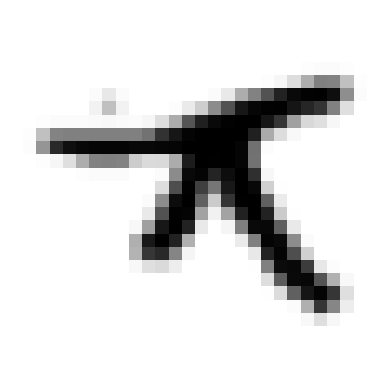

In [7]:
some_digit=x_train[810]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [8]:
y_train[810]

np.uint8(20)

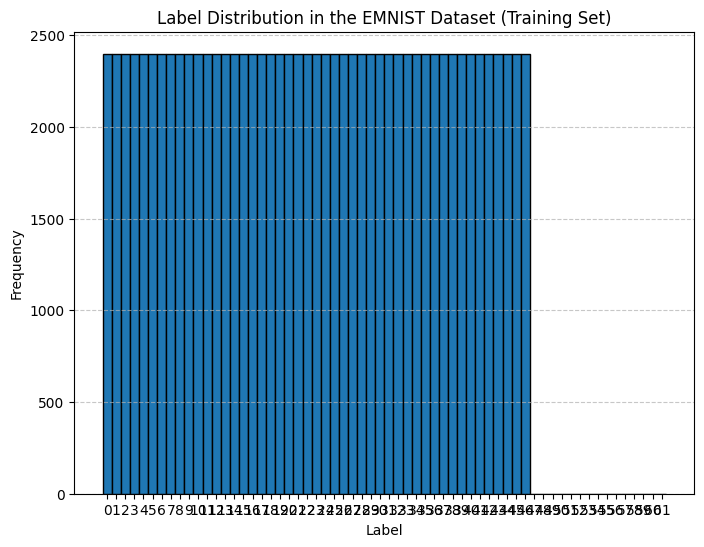

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=np.arange(0, 63) - 0.5, edgecolor='black')
plt.title("Label Distribution in the EMNIST Dataset (Training Set)")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.xticks(range(62))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Optimal k: 5, Accuracy: 0.7846


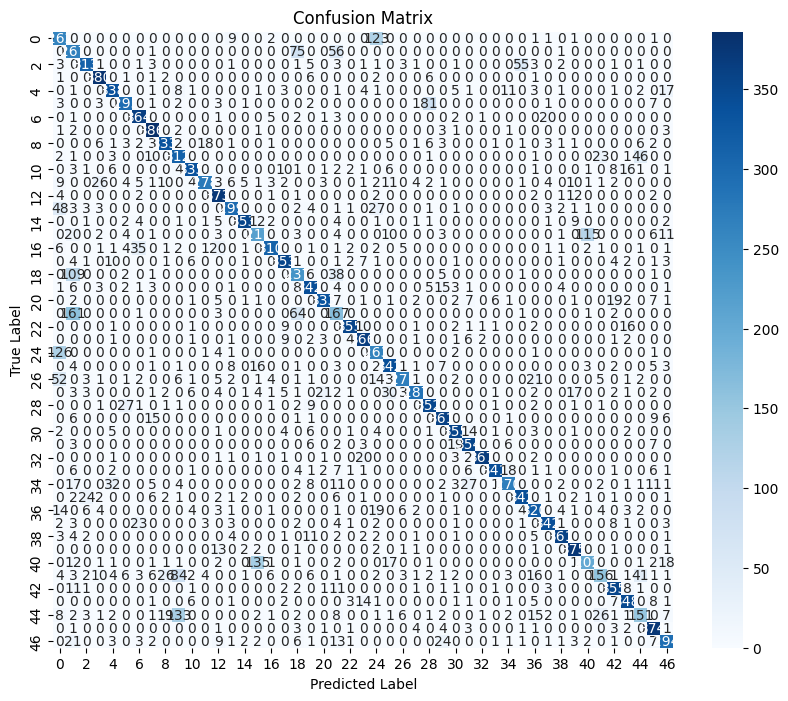

In [7]:
#knn algorithm
(x_train, y_train), (x_test, y_test) = load_emnist_data()
x_train = x_train.reshape(112800, 784)
x_test = x_test.reshape(18800, 784)

best_k = 1
best_accuracy = 0

for k in range(1, 11): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test) 
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = knn.score(x_test, y_test)
print(f"Optimal k: {best_k}, Accuracy: {best_accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C: 0.01, Accuracy: 0.6820
C: 0.1, Accuracy: 0.6895
C: 1, Accuracy: 0.6605
C: 10, Accuracy: 0.6610
C: 100, Accuracy: 0.6595
Optimal C: 0.1, Accuracy: 0.6895
Test accuracy: 0.6895


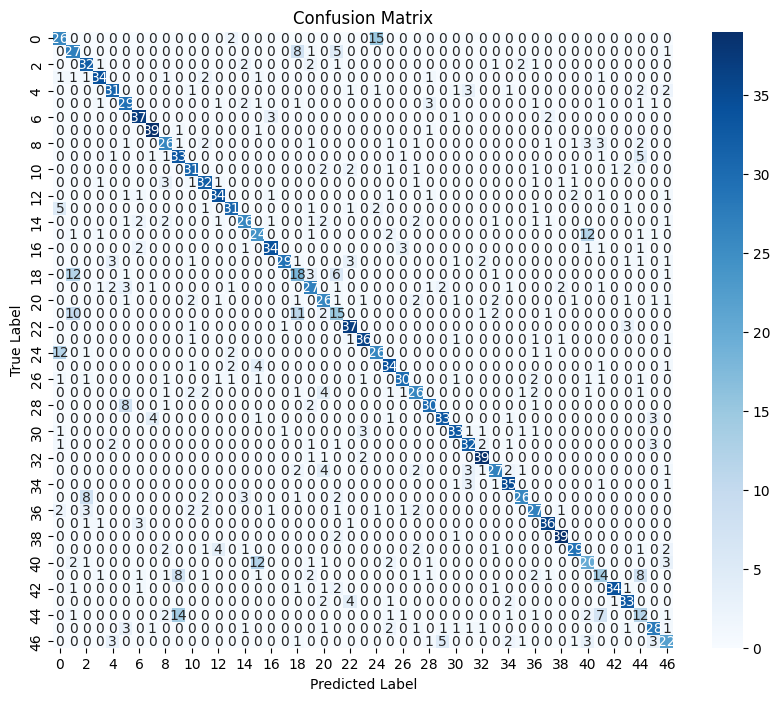

In [8]:
#svm algorithm
(x_train, y_train), (x_test, y_test) = load_emnist_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=10000, random_state=42, stratify=y_train)
x_test, _, y_test, _ = train_test_split(x_test, y_test, train_size=2000, random_state=42, stratify=y_test)

c_values=[0.01,0.1,1,10,100]
best_c=c_values[0]
best_accuracy=0
for c in c_values:
    svm = SVC(kernel='linear', C=c, random_state=42)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C: {c}, Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_c = c
        best_accuracy = accuracy

print(f"Optimal C: {best_c}, Accuracy: {best_accuracy:.4f}")

svm = SVC(kernel='linear', C=best_c, random_state=42)
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

.
.
.
Logistic Regression Test Accuracy: 0.6924


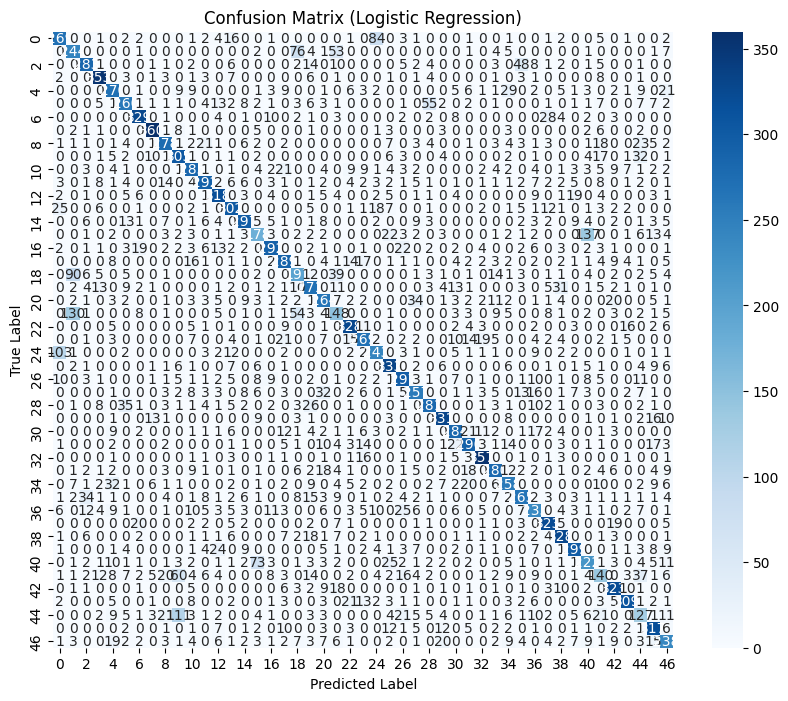

In [5]:
#logistic regression algorithm
from sklearn.decomposition import PCA
(x_train, y_train), (x_test, y_test) = load_emnist_data()

x_train_flat = x_train.reshape(x_train.shape[0], -1)/255.0
x_test_flat = x_test.reshape(x_test.shape[0], -1)/255.0
print('.')
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)
print('.')
logreg = LogisticRegression(max_iter=500,solver='saga',random_state=42,verbose=0)
logreg.fit(x_train_pca, y_train)
print('.')
y_pred_logreg = logreg.predict(x_test_pca)

accuracy = logreg.score(x_test_pca, y_test)
print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")

cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

Test accuracy: 0.6275


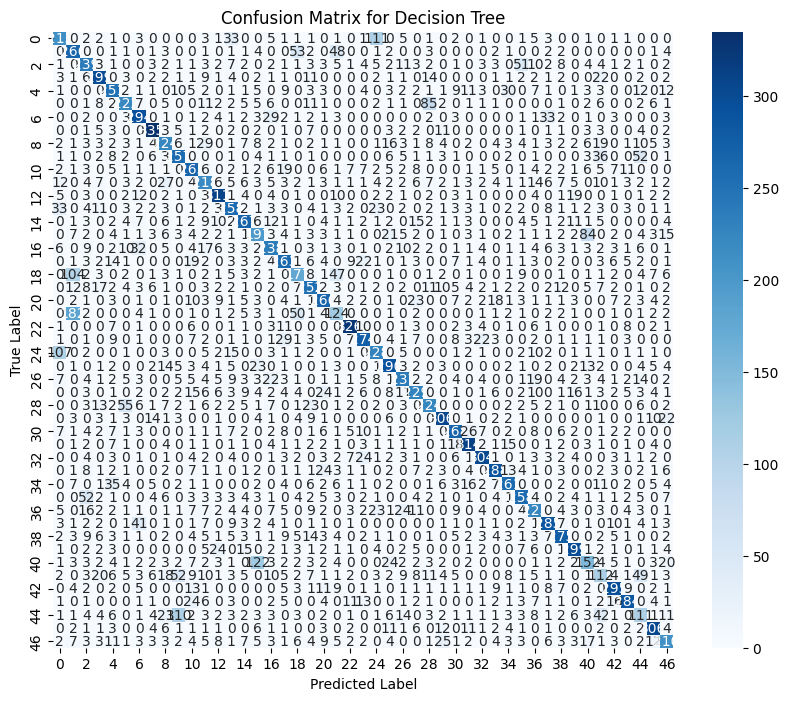

In [20]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

(x_train, y_train), (x_test, y_test) = load_emnist_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy'
    )

dt_classifier.fit(x_train, y_train)

y_pred = dt_classifier.predict(x_test)
accuracy = dt_classifier.score(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Epoch 1/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 75s 91ms/step - accuracy: 0.5057 - loss: 1.8162 - val_accuracy: 0.8027 - val_loss: 0.5807
Epoch 2/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 72s 90ms/step - accuracy: 0.7746 - loss: 0.6661 - val_accuracy: 0.8171 - val_loss: 0.5273
Epoch 3/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.8056 - loss: 0.5647 - val_accuracy: 0.8379 - val_loss: 0.4583
Epoch 4/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8205 - loss: 0.5142 - val_accuracy: 0.8285 - val_loss: 0.4911
Epoch 5/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 76s 95ms/step - accuracy: 0.8303 - loss: 0.4793 - val_accuracy: 0.8479 - val_loss: 0.4281
Epoch 6/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 76s 96ms/step - accuracy: 0.8399 - loss: 0.4500 - val_accuracy: 0.8447 - val_loss: 0.4203
Epoch 7/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.8467 - loss: 0.4260 - val_accuracy: 0.8488 - val_loss: 0.4166
Epoch 8/15
794/794 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.8489 - loss: 0.4143 -

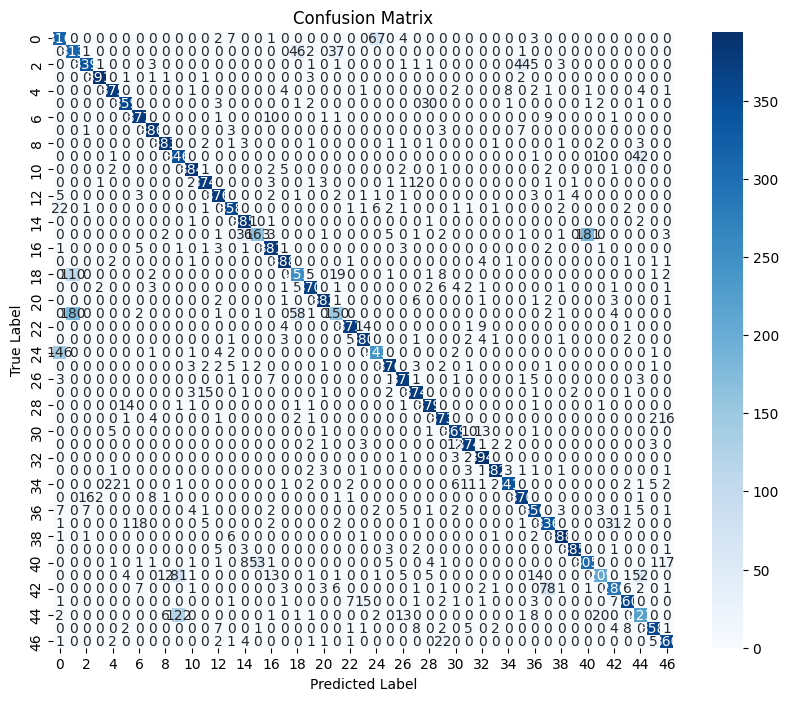

In [ ]:
from tensorflow import keras
from keras import layers,Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.makedirs("checkpoints", exist_ok=True)
(x_train, y_train), (x_test, y_test) = load_emnist_data()
# CNN Model( Artificial neural Network)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

model = Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.6),
        layers.Dense(128,activation="relu"),
        layers.Dense(62, activation="softmax"),
    ]
)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
checkpoint_path="checkpoints/cnn_model_best.h5"
checkpoint_callback=ModelCheckpoint(
    filepath=checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=False,
    mode="max",
    verbose=1,
)
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.1,callbacks=[checkpoint_callback])

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
y_test[810]

np.uint8(12)

In [15]:
y_pred[810]

np.int64(12)